# Projeto da disciplina de Modelagem Preditiva e Descritiva I - UFPE

Tadao Ando Junior (tjunior@atech.com.br)

## Preparação do ambiente

In [190]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import os.path

# Carga do arquivo no formato arff
from scipy.io.arff import loadarff 

# Préprocessamento de atributos categóricos
from sklearn.preprocessing import OneHotEncoder

# Métodos de seleção
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Métricas
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Define tamanho padrão dos plotes
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

## Carga do banco de dados

In [224]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
        print('Loading dataset from github tadj8/mpd')
        dataset_name = 'collins.arff'
        if not os.path.isfile(dataset_name):
                urllib.request.urlretrieve("https://raw.githubusercontent.com/tadj8/mpd/main/datasets/collins.arff", dataset_name)
else:
        print('Reading dataset from local file')
        raw_data = loadarff("datasets/collins.arff")
        df_orig = pd.DataFrame(raw_data[0])

Reading dataset from local file


In [175]:
df_orig

,Text,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,...,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Genre,Counter,Corpus,Corp.Genre
0,b'A01.TXT',0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,...,0.75,0.35,2.55,1.63,0.79,28.31,b'1',1.0,b'1',b'101'
1,b'A02.TXT',0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,...,0.59,0.25,1.77,1.39,0.80,23.91,b'1',2.0,b'1',b'101'
2,b'A03.TXT',0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,...,0.65,0.17,2.32,1.94,0.82,30.15,b'1',3.0,b'1',b'101'
3,b'A04.TXT',0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,...,0.67,0.09,1.89,1.71,0.81,29.43,b'1',4.0,b'1',b'101'
4,b'A05.TXT',0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,...,0.75,0.35,1.54,1.80,0.96,27.89,b'1',5.0,b'1',b'101'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'rFR5.txt',0.49,3.25,0.41,2.10,1.07,0.25,3.29,1.93,1.65,...,0.70,0.90,1.19,1.77,1.07,34.11,b'15',996.0,b'2',b'215'
996,b'rFR6.txt',5.17,4.86,1.08,0.99,1.26,0.45,3.51,1.17,0.00,...,1.26,0.18,1.35,1.08,1.26,38.95,b'15',997.0,b'2',b'215'
997,b'rFR7.txt',0.00,2.70,1.30,1.21,1.21,1.30,2.16,1.35,0.18,...,1.08,0.31,5.13,1.71,1.08,40.36,b'15',998.0,b'2',b'215'
998,b'rFR8.txt',0.73,1.96,0.41,0.37,1.06,0.65,2.04,0.86,0.08,...,3.02,1.02,4.41,0.61,0.41,42.53,b'15',999.0,b'2',b'215'


### Preparação e análise do dataset

In [176]:
df = df_orig.copy()

# Nosso target:
#    Corp.Genre : Combinação do Gênero (atribuído pelos compiladores do corpora) e corpus (1=Brown e 2=Frown)

# Gênero é categórica e não tem ordinalidade entre as classes. Portanto, decidimos usar OneHotEncoding para transformar
# em numérica:
# df = df.join(pd.get_dummies(df['Genre'], prefix='genre'))
df['Corp.Genre'] = df['Corp.Genre'].factorize()[0]

# Remove colunas que não utilizaremos:
#   Genre / Corpus : As duas colunas juntas são o target e já estão combinadas em Corp.Genre, portanto podem ser removidas
#   Text : nome do texto de origem
#
df.drop(['Text', 'Corpus', 'Counter', 'Genre'], axis=1, inplace=True)
df_orig.drop(['Text', 'Corpus', 'Counter', 'Genre'], axis=1, inplace=True)

In [179]:
df_orig

,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,Interacting,Notifying,LinearGuidance,WordPicture,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Corp.Genre
0,0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,0.00,2.11,5.23,5.01,0.75,0.35,2.55,1.63,0.79,28.31,b'101'
1,0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,0.17,1.77,3.46,4.34,0.59,0.25,1.77,1.39,0.80,23.91,b'101'
2,0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,0.17,2.84,5.03,5.85,0.65,0.17,2.32,1.94,0.82,30.15,b'101'
3,0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,0.31,2.47,3.15,3.28,0.67,0.09,1.89,1.71,0.81,29.43,b'101'
4,0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,0.35,2.54,5.79,3.16,0.75,0.35,1.54,1.80,0.96,27.89,b'101'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.49,3.25,0.41,2.10,1.07,0.25,3.29,1.93,1.65,2.39,3.17,4.28,4.20,0.70,0.90,1.19,1.77,1.07,34.11,b'215'
996,5.17,4.86,1.08,0.99,1.26,0.45,3.51,1.17,0.00,0.58,2.92,4.72,7.11,1.26,0.18,1.35,1.08,1.26,38.95,b'215'
997,0.00,2.70,1.30,1.21,1.21,1.30,2.16,1.35,0.18,0.04,2.25,10.61,6.74,1.08,0.31,5.13,1.71,1.08,40.36,b'215'
998,0.73,1.96,0.41,0.37,1.06,0.65,2.04,0.86,0.08,1.18,1.47,11.23,11.02,3.02,1.02,4.41,0.61,0.41,42.53,b'215'


In [177]:
# Cria um dicionario com o mapeamento entre os valores originais e os fatorizados e vice-versa para consulta posterior
orig_to_ordinal={}
ordinal_to_orig={}
keys=list(df_orig['Corp.Genre'].unique())

for i in range(0,30):
        orig_to_ordinal[keys[i]] = i
        ordinal_to_orig[i]=keys[i]

In [178]:
# Identificando valores menos e mais comuns
df['Corp.Genre'].value_counts().sort_values()

26     6
11     6
29     9
14     9
17    17
18    17
3     17
2     17
10    24
25    24
16    27
1     27
13    29
24    29
9     29
27    29
12    29
28    29
7     30
22    30
4     36
19    36
15    44
0     44
5     48
20    48
6     75
21    75
23    80
8     80
Name: Corp.Genre, dtype: int64

In [87]:
# Gera profile do dataset com pandas_profiling (não consegui rodar isso no google collab, somente localmente)
# O relatório pode ser visto com um browser

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file('report_corpus.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


## Experimentos

In [220]:
# Função de análise usando kfold + gridsearch
def grid_search(skf, model, parameters, X, y):
  accuracies_list = []
  fold = 0

  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
    
        grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
    
        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
  return pd.DataFrame(grid.cv_results_)


### kNN

In [221]:
X = df.iloc[:,0:18]
y = df.iloc[:,19]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

              precision    recall  f1-score   support

           0       0.18      0.43      0.25        14
           1       0.17      0.30      0.21        10
           2       0.00      0.00      0.00         5
           3       0.33      0.50      0.40         4
           4       0.38      0.38      0.38         8
           5       0.09      0.10      0.10        10
           6       0.16      0.35      0.22        17
           7       0.17      0.12      0.14         8
           8       0.29      0.10      0.15        20
           9       0.12      0.33      0.18         6
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          12       0.30      0.50      0.37         6
          13       0.33      0.29      0.31         7
          14       0.00      0.00      0.00         4
          15       0.38      0.36      0.37        14
          16       0.27      0.38      0.32         8
          17       0.25    

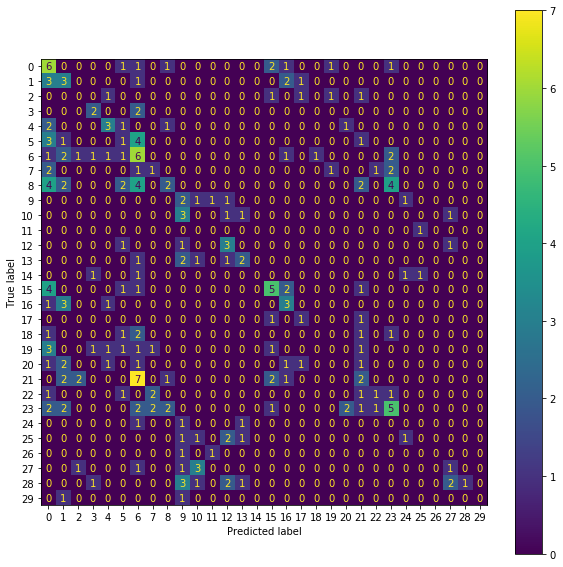

In [222]:
model = KNeighborsClassifier()

# Treinando o modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

In [223]:
parameters = { 'n_neighbors' : [10, 30, 50, 70] }
grid_search(StratifiedKFold(n_splits=10, random_state=42, shuffle=True), KNeighborsClassifier(), parameters, X, y)

Melhor parametro: {'n_neighbors': 30}
Fold 0: 0.300
Melhor parametro: {'n_neighbors': 30}
Fold 1: 0.280
Melhor parametro: {'n_neighbors': 50}
Fold 2: 0.230
Melhor parametro: {'n_neighbors': 30}
Fold 3: 0.330
Melhor parametro: {'n_neighbors': 30}
Fold 4: 0.210
Melhor parametro: {'n_neighbors': 10}
Fold 5: 0.230
Melhor parametro: {'n_neighbors': 50}
Fold 6: 0.270
Melhor parametro: {'n_neighbors': 50}
Fold 7: 0.190
Melhor parametro: {'n_neighbors': 30}
Fold 8: 0.250
Melhor parametro: {'n_neighbors': 30}
Fold 9: 0.170

Acurácia média (desvio): 0.246 +- (0.047)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001440,0.000128,0.011765,0.005599,10,{'n_neighbors': 10},0.255556,0.188889,0.266667,0.155556,0.172222,0.207778,0.044942,4
1,0.001472,0.000241,0.011036,0.005037,30,{'n_neighbors': 30},0.266667,0.233333,0.244444,0.211111,0.194444,0.230000,0.025240,1
2,0.002075,0.000940,0.036320,0.026383,50,{'n_neighbors': 50},0.233333,0.188889,0.261111,0.211111,0.227778,0.224444,0.023986,2
3,0.001516,0.000274,0.013245,0.007173,70,{'n_neighbors': 70},0.227778,0.183333,0.238889,0.205556,0.244444,0.220000,0.022662,3
